In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.evaluation import get_unique_codes

# Model Consolidation

This notebook consolidates the model of requirements-affected activities and their attributes from the data generated during this study.

In [3]:
df = pd.read_excel('../data/r3a-data-extraction.xlsx', sheet_name='Data')

In [4]:
data_sources = {
    'E': 'experimental literature',
    'I': 'interview study',
    'S': 'software process literature'
}

In [5]:
variables = ['Activity', 'Activity Attributes', 'Artifact', 'Artifact Attributes']

## Data Cleaning

Firstly, we perform the data cleaning process as outlined in the [data evaluation](data-evaluation.ipynb) notebook. This includes the removal of all experimental studies which did not meet all inclusion or any of the exclusion criteria once evaluated on the full text, and the exclusion of data points (activity-attribute description pairs) where the attribute does not imply a valuation.

In [6]:
df = df[df['F']==False] # remove all these wrongfully included primary studies (i.e., false positives) from the data set
df = df[df['Val']==False] # remove all these wrongfully included data points (i.e., false positives) from the data set

obtain unique codes

In [7]:
codes = {variable: get_unique_codes(df, variable) for variable in variables}

### Codes per Data Source

Visualize the distribution of the unique codes per data source.

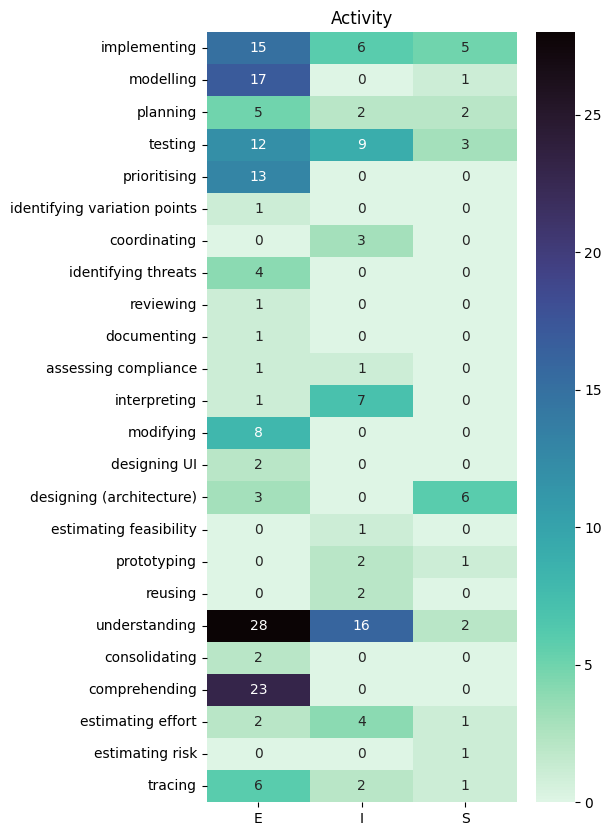

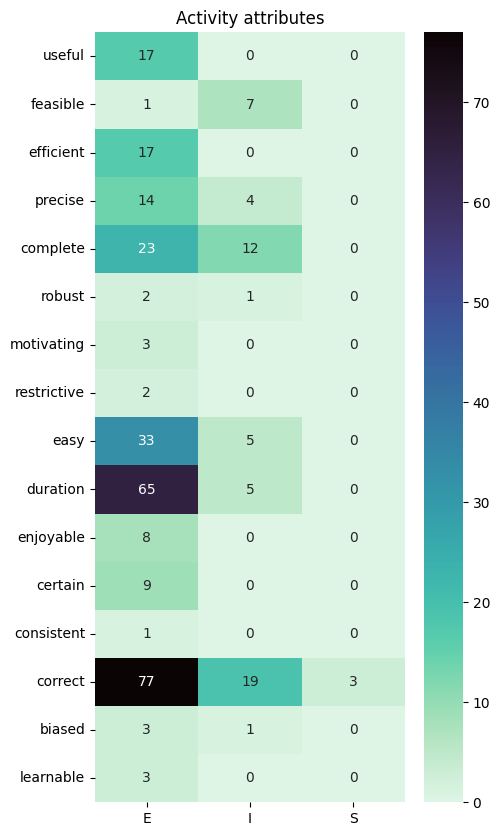

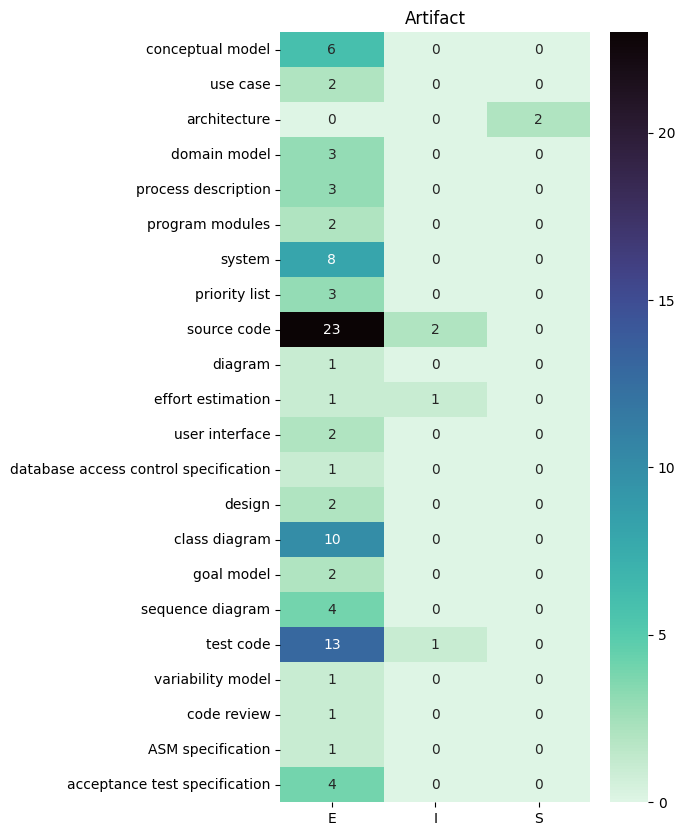

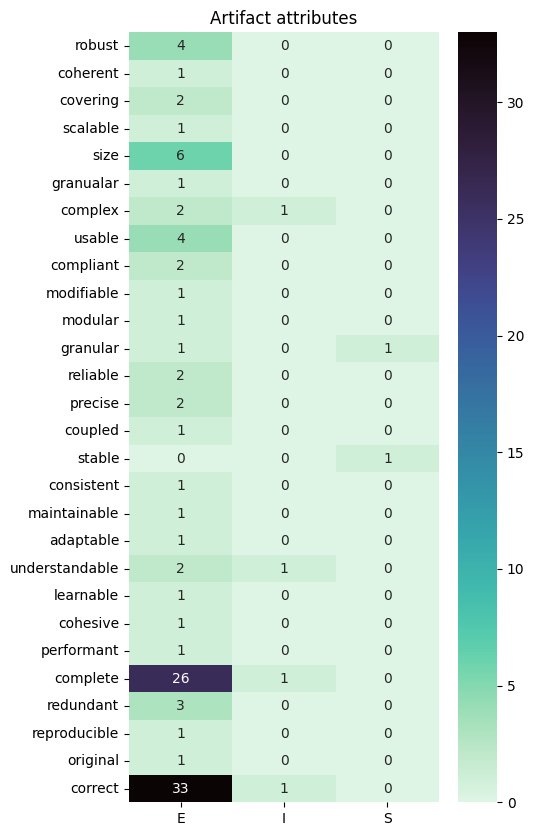

In [18]:
for variable in variables:
    mention_count = {code: [0, 0, 0] for code in codes[variable]}
    mentions = pd.DataFrame.from_dict(mention_count, orient='index', columns=data_sources)

    for index, row in df.iterrows():
        # check that this row actually contains an activity code (and not nan)
        if type(row[variable]) == str:
            all_mentioned = row[variable].split(';')
            for mentioned in all_mentioned:
                mentions.loc[mentioned][row['Type']] += 1

    plt.rcParams["figure.figsize"] = (5,10)
    ax = sns.heatmap(mentions, annot= True, cmap='mako_r')
    ax.set_title(variable.capitalize())
    plt.show()

### Distribution of Attributes

Determine, which attributes are applicable to which activities/artifacts

In [11]:
# expand the dataframe, i.e., fill in all activity codes that were skipped
df_exp = df.copy()

current_id = 'E0'
current_activity = ''

for index, row in df_exp.iterrows():
    if current_id != row['ID']:
        current_id = row['ID']
        current_activity = row['Activity']
        continue
    
    # detect if the current activity code is NaN (i.e., its type is float)
    if type(row['Activity']) == float:
        df_exp.at[index, 'Activity'] = current_activity

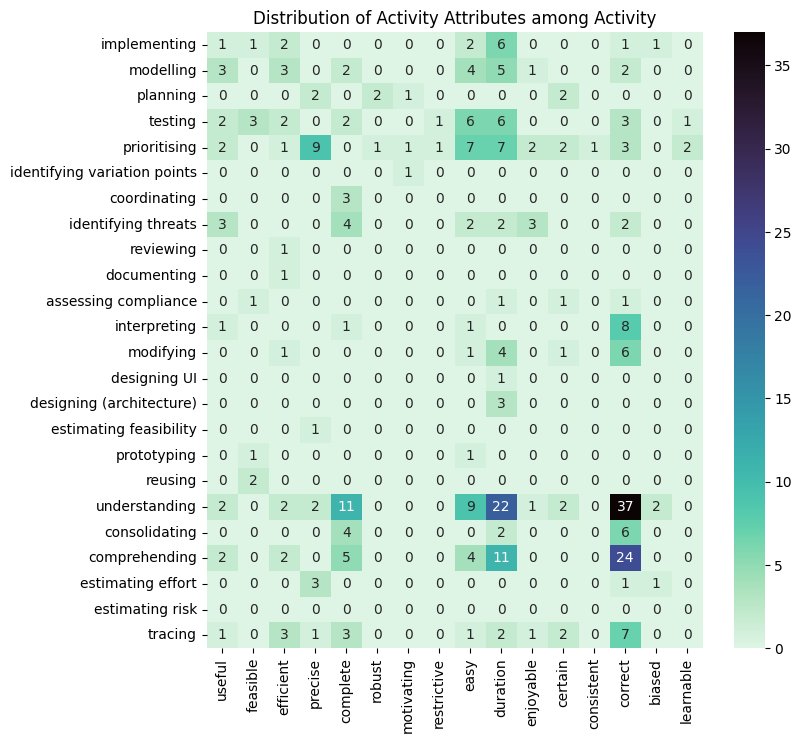

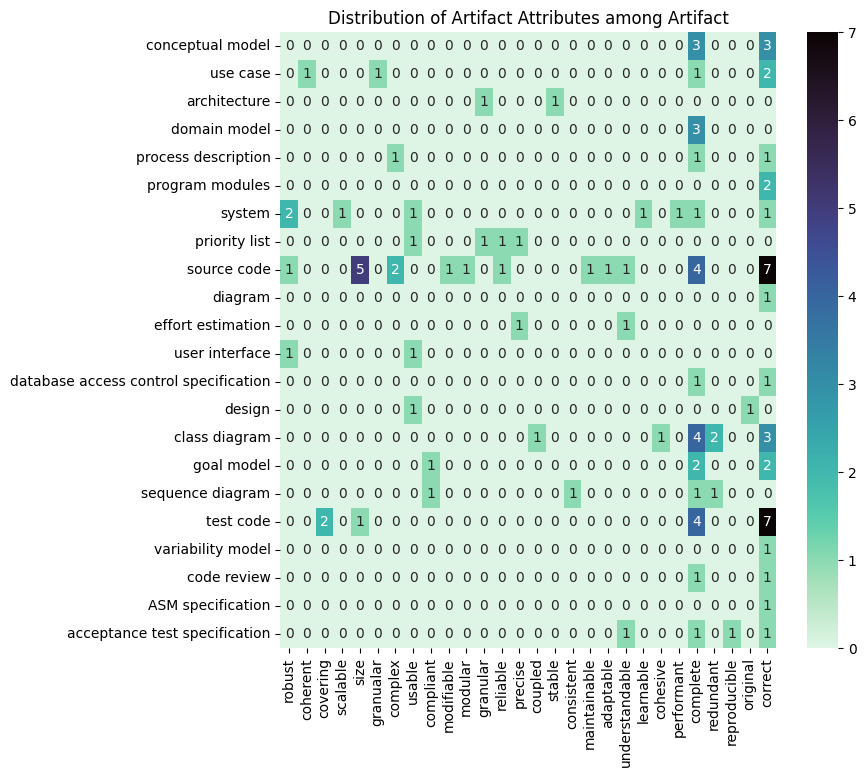

In [20]:
plt.rcParams["figure.figsize"] = (8,8)

for type_entity, type_attribute in zip(['Activity', 'Artifact'], ['Activity Attributes', 'Artifact Attributes']):
    # prepare the matrix in a data frame
    association = {entity: [0 for attribute in codes[type_attribute]] for entity in codes[type_entity]}
    matrix = pd.DataFrame.from_dict(association, orient='index', columns=codes[type_attribute])

    for index, row in df_exp.iterrows():
        if type(row[type_entity]) == str and type(row[type_attribute]) == str:
            coded_entities = row[type_entity].split(';')
            coded_attributes = row[type_attribute].split(';')

            for coded_entity in coded_entities:
                for coded_attribute in coded_attributes:
                    matrix.loc[coded_entity][coded_attribute] += 1

    ax = sns.heatmap(matrix, annot= True, cmap='mako_r')
    ax.set_title(f'Distribution of {type_attribute} among {type_entity}')
    plt.show()